_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
5995,74,135000.0,0,1,4.5,0,1,2011,1
873,4,55000.0,1,24,2.8,2,1,2014,1
2308,23,2300.0,3,240,2.0,0,0,2001,0
6175,77,9800.0,5,220,1.9,0,1,2008,0
6347,50,2300.0,1,175,1.4,3,0,2000,0
6066,23,17950.0,5,90,1.6,0,1,2014,0
695,39,22800.0,0,45,2.0,0,1,2013,1
5829,5,32900.0,0,90,3.0,3,1,2008,1
4266,76,4100.0,2,5,1.6,1,1,2008,0
202,5,28000.0,3,170,2.0,0,1,2011,2


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [3]:
target = 'price'
features = df.drop(columns='price').columns
X = df[features]
y = df[target]

print('X', X.shape, type(X))
print('y', y.shape, type(y))

X (8495, 8) <class 'pandas.core.frame.DataFrame'>
y (8495,) <class 'pandas.core.series.Series'>


## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [5]:
# First, look for features that might be correlated with price
df.corr()['price'].sort_values(ascending=False)

price           1.000000
year            0.393562
drive           0.221952
registration    0.124062
engV            0.066226
engType        -0.021051
make           -0.083205
body           -0.253726
mileage        -0.336940
Name: price, dtype: float64

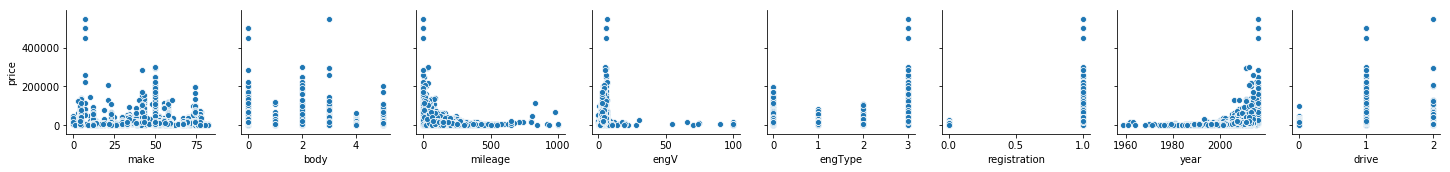

In [6]:
# Plot 'price' against the feature set
sns.pairplot(data=df, x_vars=features, y_vars=target);

In [7]:
# I don't believe 'registration' or 'engV' will be statistically significant for this regression model
features = ['make', 'body', 'mileage', 'engType', 'year', 'drive']

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [8]:
# Intialize and fit the OLS model
mult_reg_model = LinearRegression()
mult_reg_model.fit(X_train[features], y_train)
print('Intercept:\t', mult_reg_model.intercept_ )
print('Coefficients:\n', mult_reg_model.coef_)

Intercept:	 -2298109.992382088
Coefficients:
 [  -31.36962925 -1798.9485613    -41.00734994 -1012.66714868
  1157.41449599  8437.77919695]


## 1.5 Use the test data to make predictions.

In [9]:
mult_reg_model.predict(X_test[features])

array([19424.23133997,  5234.80483287, 26692.68934864, ...,
       29009.40403785,  9129.38021313, 13939.37893372])

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [10]:
r_squared = r2_score(y_test, mult_reg_model.predict(X_test[features]))
rmse = np.sqrt(mean_squared_error(y_test, mult_reg_model.predict(X_test[features])))
print('R^2 score:\t\t\t', r_squared)
print('Root Mean Squared Error:\t', rmse)

R^2 score:			 0.2863910693505859
Root Mean Squared Error:	 21481.034887522535


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?

The coefficient for `year` is: 1157.41449599. This should be interpreted as, "For every year that a car ages, it's value decreases by $1157.42 and vice versa."

## 1.8 How should we interpret the Root Mean Square Error?

The RMSE is 21481.034887522535. This is the measure of the standard deviation of residuals to the line of regression. This model's score is high; meaning that the line of best fit actually doesn't fit the data points too well for it's predictions.

## 1.9 How should we interpret the $R^2$?

The $R^2$ score is very low for this model, showing us that it doesn't adequately explain the variance of the test data target feature.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [11]:
df['ln_price'] = np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

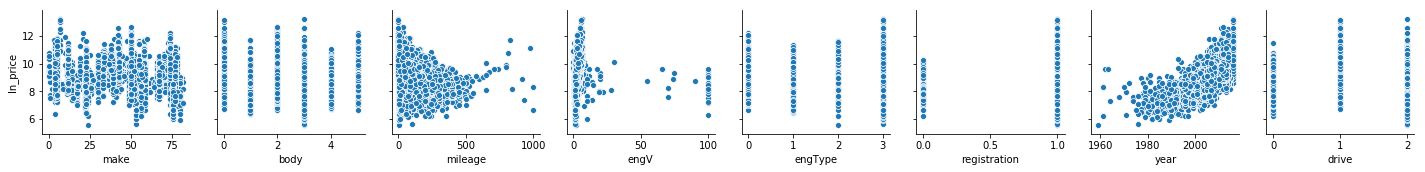

In [12]:
target = 'ln_price'
features = df.drop(columns=['price', 'ln_price']).columns

sns.pairplot(data=df, x_vars=features, y_vars=target);

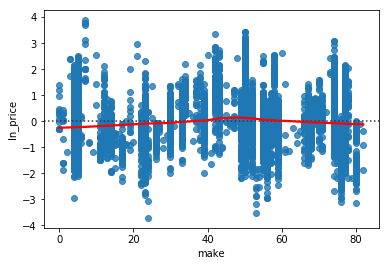

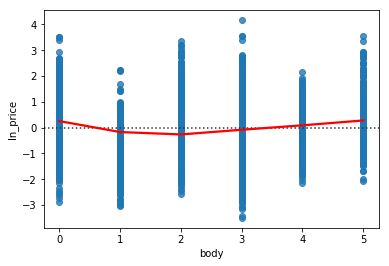

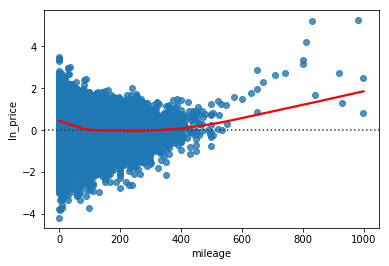

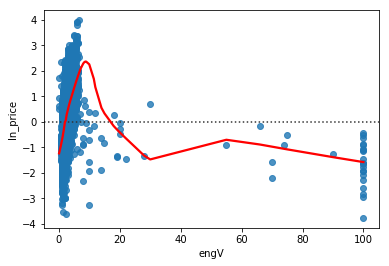

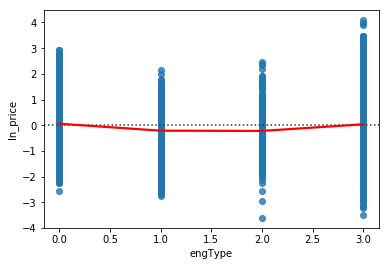

D:\Miniconda\envs\JupyterLab\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
D:\Miniconda\envs\JupyterLab\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
D:\Miniconda\envs\JupyterLab\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


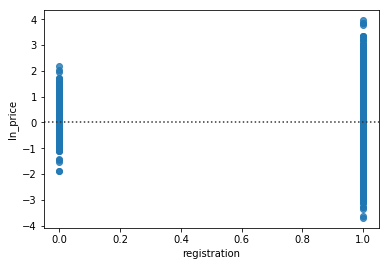

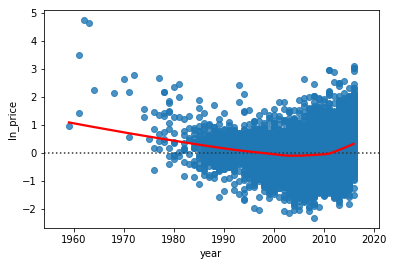

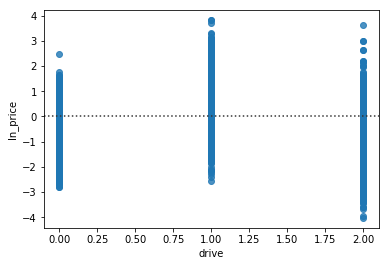

In [13]:
for feature in features:
    sns.residplot(df[feature], df[target], lowess=True, line_kws=dict(color='r'))
    plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [14]:
df['squared_year'] = df['year']**2
df['squared_mileage'] = df['mileage']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [15]:
features = df.drop(columns=['price', 'ln_price']).columns
target = 'ln_price'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

log_poly_model = LinearRegression()
log_poly_model.fit(X_train, y_train)

y_pred = log_poly_model.predict(X_test)
y_true = y_test

r_squared = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print('Model intercept: ', log_poly_model.intercept_)
print('Model coefficients:\n', log_poly_model.coef_)
print('R^2 score: ', r_squared)
print('RMSE: ', rmse)

Model intercept:  6082.256345350028
Model coefficients:
 [-1.68957134e-03 -9.42269254e-02  7.78177052e-04  8.22070681e-03
 -4.80904423e-02  6.71842604e-01 -6.17044214e+00  3.74004369e-01
  1.56661127e-03 -2.06653079e-07]
R^2 score:  0.6694853735895604
RMSE:  0.5628084508077883


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Coefficients in Log-Linear Regression are to be interpreted as percentages. For every unit of change for a given feature, the value of the car will change by that percentage.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [16]:
# I'm going to try fitting the Decision Tree Regressor to the log-transformed target and all features first.
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [17]:
print('R-squared / Model score: ', tree_reg.score(X_test, y_test))

R-squared / Model score:  0.8686155477227799


In [19]:
# Compare against non-log-transformed y and no engineered features
target = 'price'
features = df.drop(columns=['ln_price', 'price', 'squared_year', 'squared_mileage']).columns
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

tree_no_poly = DecisionTreeRegressor()
tree_no_poly.fit(X_train, y_train)

print('R-squared / Model score: ', tree_no_poly.score(X_test, y_test))

R-squared / Model score:  0.8218148619557379


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [20]:
# Log-Linear Regression with robust standard errors
features = df.drop(columns=['price', 'ln_price', 'squared_year', 'squared_mileage']).columns
target = 'ln_price'
X = df[features]
y = df[target]

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.880e+05
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        13:01:29   Log-Likelihood:                -9774.5
No. Observations:                8495   AIC:                         1.956e+04
Df Residuals:                    8487   BIC:                         1.962e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make            -0.0035      0.000     -9.106   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [21]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

D:\Miniconda\envs\JupyterLab\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           123262.013632
make                 1.059149
body                 1.158326
mileage              1.549610
engV                 1.009321
engType              1.141183
registration         1.091892
year                 1.458528
drive                1.131021
dtype: float64

There does not appear to be a multicollinearity problem with the log-linear regression: all feature variable VIFs are within an acceptable range (VIF < 5). Under the log-polynomial regression there would likely be multicollinearity problems between the engineered features and the original features.